In [2]:
%matplotlib inline  

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize


from scipy.ndimage import convolve

from collections import Counter

import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



# Live Demo Working with Images and Text

In [4]:
tiger_image = imread('Data/tiger.jpg')

In [5]:
tiger_image.shape

(600, 580, 3)

In [6]:
tiger_image.dtype

dtype('uint8')

In [7]:
tiger_image[20, 100]

array([235, 235, 233], dtype=uint8)

In [8]:
# Extracting color channels separately
r, g, b = tiger_image[:, :, 0], tiger_image[:, :, 1], tiger_image[:, :, 2]

In [9]:
r.shape

(600, 580)

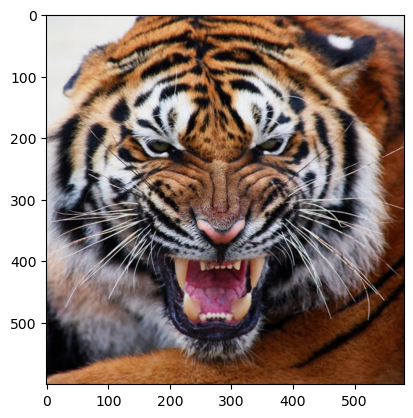

In [10]:
plt.imshow(tiger_image)
plt.show()

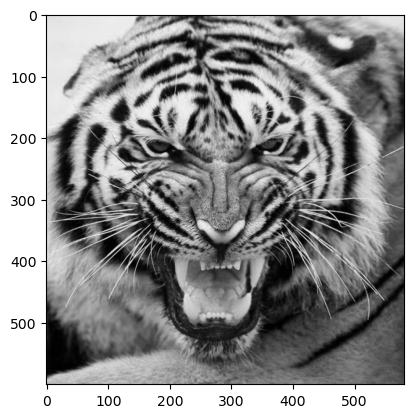

In [11]:
plt.imshow(r, cmap = 'gray')
plt.show()

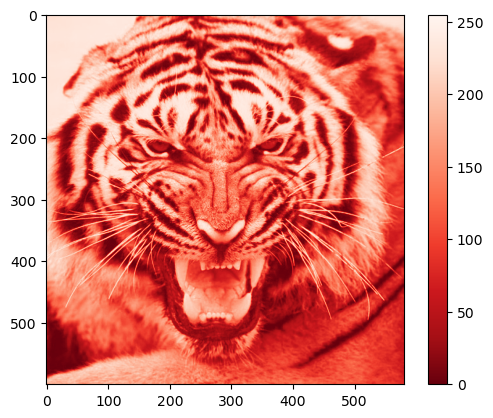

In [12]:
# Reds_r reverse the colorbar
plt.imshow(r, cmap = 'Reds_r')
plt.colorbar()
plt.show()

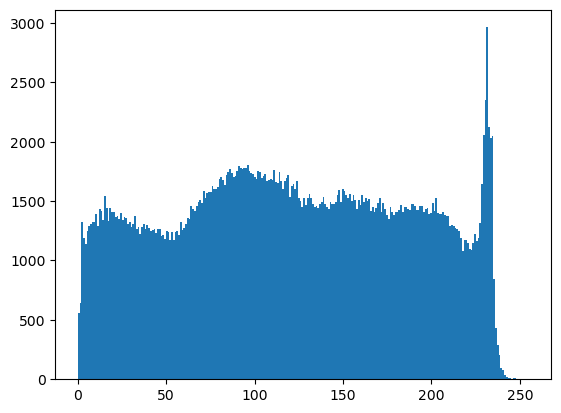

In [13]:
# Ravel will concatenate all rows in one row
plt.hist(r.ravel(), bins = 256)
plt.show()

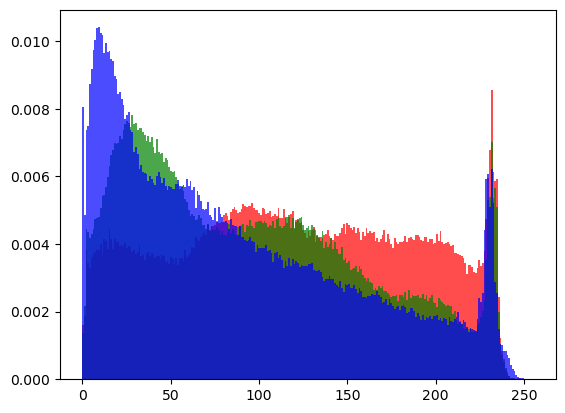

In [14]:
# Density = True normalizes the values along the ordinate axis.
plt.hist(r.ravel(), bins = 256, color = 'r', alpha = 0.7, density = True)
plt.hist(g.ravel(), bins = 256, color = 'g', alpha = 0.7, density = True)
plt.hist(b.ravel(), bins = 256, color = 'b', alpha = 0.7, density = True)

plt.show()

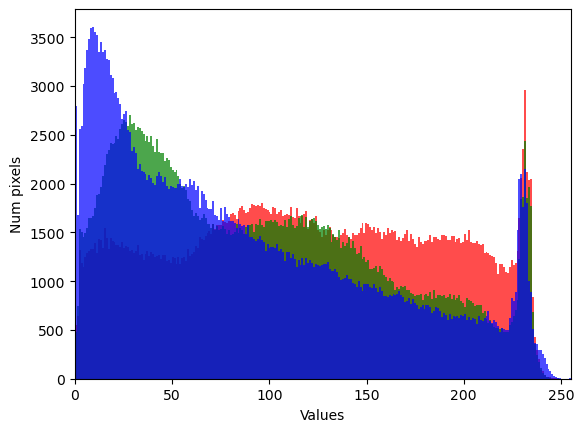

In [15]:
plt.hist(r.ravel(), bins = 256, color = 'r', alpha = 0.7)
plt.hist(g.ravel(), bins = 256, color = 'g', alpha = 0.7)
plt.hist(b.ravel(), bins = 256, color = 'b', alpha = 0.7)
plt.xlabel('Values')
plt.ylabel('Num pixels')

plt.xlim(0, 255)

plt.show()

In [16]:
# Color perception of the human eye
tiger_grayscale = 0.299 * r + 0.587 * g + 0.114 * b

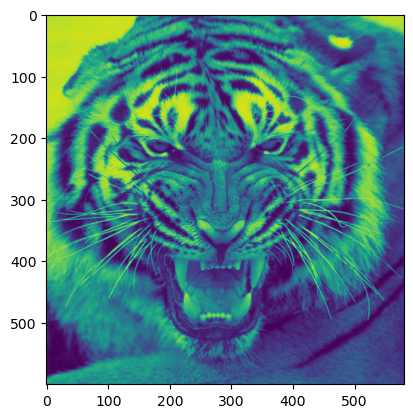

In [17]:
plt.imshow(tiger_grayscale)
plt.show()

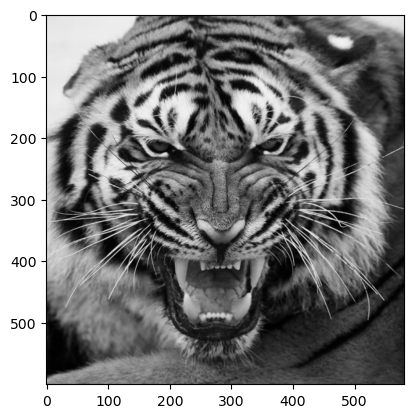

In [18]:
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()

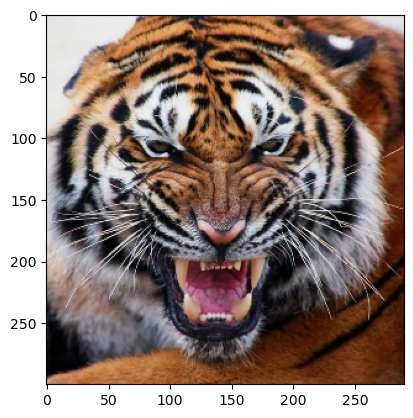

In [19]:
# Down sampling - reduces the size of the image
plt.imshow(tiger_image[::2,::2,:], cmap = 'gray')
plt.show()

In [20]:
tiger_image[::2,::2,:].shape

(300, 290, 3)

In [21]:
tiger_image.shape

(600, 580, 3)

In [22]:
np.product(tiger_image[::2,::2,:].shape), np.product(tiger_image.shape), np.product(tiger_image.shape) / np.product(tiger_image[::2,::2,:].shape)

(261000, 1044000, 4.0)

## Convolution

### Blending an image with a smaller matrix called a filter

In [23]:
tiger_sample = tiger_grayscale[100:110, 100:110].astype(int)

In [24]:
tiger_sample

array([[159, 154, 151, 144, 126, 108, 105, 106, 118, 113],
       [158, 144, 136, 132, 118, 104,  92,  82,  90,  91],
       [155, 137, 124, 123, 111, 103,  90,  77,  77,  80],
       [149, 132, 116, 107, 111, 114, 103,  88,  81,  74],
       [138, 121, 105, 103, 115, 119, 118, 103,  83,  67],
       [133, 116, 104, 107, 113, 115, 109,  92,  73,  61],
       [131, 117, 108, 111, 112, 104,  90,  77,  71,  65],
       [119, 105,  94,  94,  99, 101,  92,  77,  68,  60],
       [111, 103,  98,  95,  94, 104, 100,  80,  62,  56],
       [101, 100, 100,  97,  96,  93,  87,  72,  59,  58]])

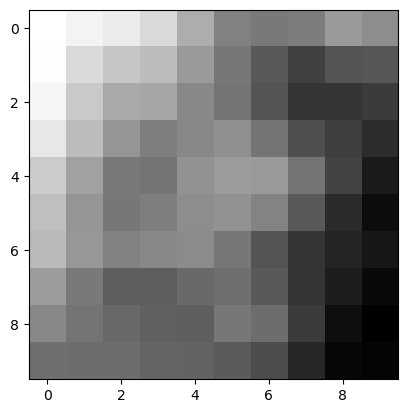

In [25]:
plt.imshow(tiger_sample, cmap = 'gray')
plt.show()

In [26]:
conv_filter = np.array([
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
])

In [27]:
tiger_convolve = convolve(tiger_sample, conv_filter)

In [28]:
convolve(tiger_sample, conv_filter).shape

(10, 10)

In [29]:
tiger_convolve

array([[158, 144, 136, 132, 118, 104,  92,  82,  90,  91],
       [156, 147, 139, 135, 119, 107, 103, 101, 105, 102],
       [152, 139, 128, 116, 118, 115, 105,  93,  94,  85],
       [144, 126, 113, 119, 115, 108, 105,  92,  79,  73],
       [144, 127, 115, 111, 109, 110,  94,  77,  71,  68],
       [136, 122, 109, 107, 114, 108,  99,  88,  81,  71],
       [121, 104,  90,  90, 100, 112, 111,  92,  70,  56],
       [123, 115, 112, 112, 107, 107,  98,  80,  65,  61],
       [109, 102,  96,  96, 101,  90,  79,  69,  65,  62],
       [111, 103,  98,  95,  94, 104, 100,  80,  62,  56]])

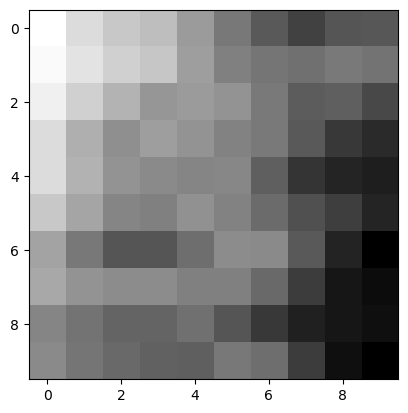

In [30]:
plt.imshow(tiger_convolve, cmap = 'gray')
plt.show()

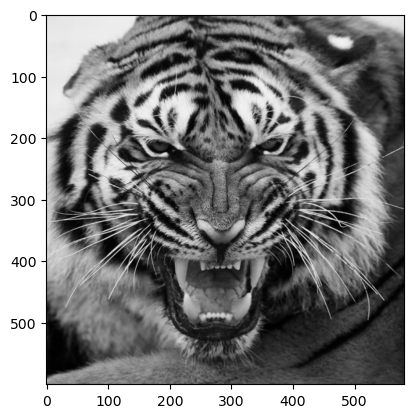

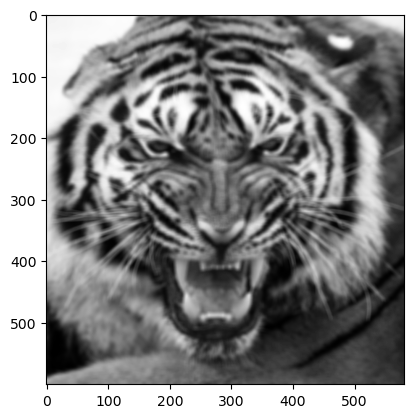

In [31]:
# np.ones() producs filter filled only with units
conv_filter = np.ones([7, 7]) / 9
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()
plt.imshow(convolve(tiger_grayscale, conv_filter), cmap = 'gray')
plt.show()

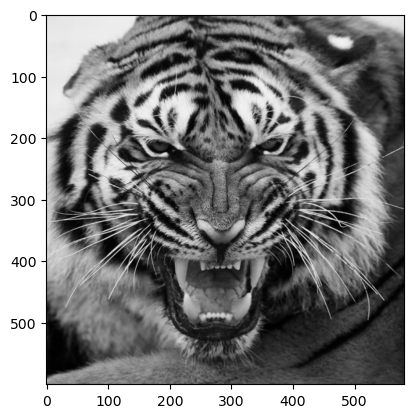

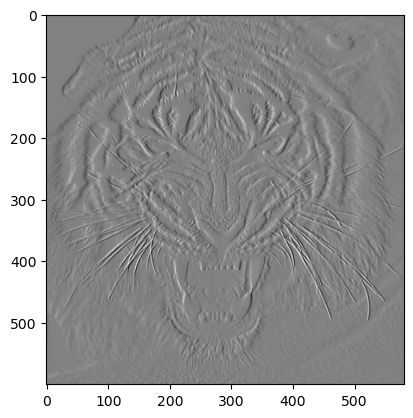

In [32]:
# Convolution filter for edge detection
conv_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()
result = convolve(tiger_grayscale, conv_filter)
plt.imshow(result, cmap = 'gray')
plt.show()

In [33]:
result.min()

-816.836

In [34]:
result.max()

793.179

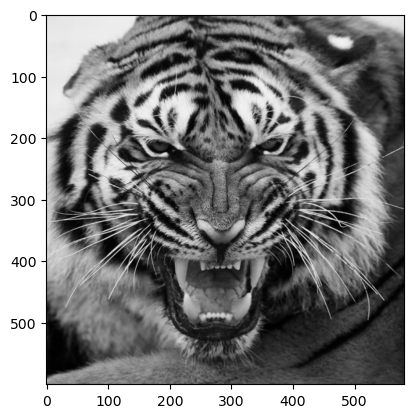

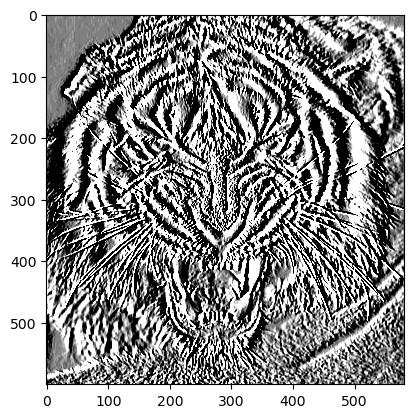

In [35]:
conv_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()
result = convolve(tiger_grayscale, conv_filter)
plt.imshow(result, cmap = 'gray', vmin= -20, vmax = 20)
plt.show()

## Image Morphology

In [36]:
tresholded = tiger_grayscale.copy()

In [37]:
# Make black-white image
tresholded[tresholded < 100] = 0
tresholded[tresholded >= 100] = 255

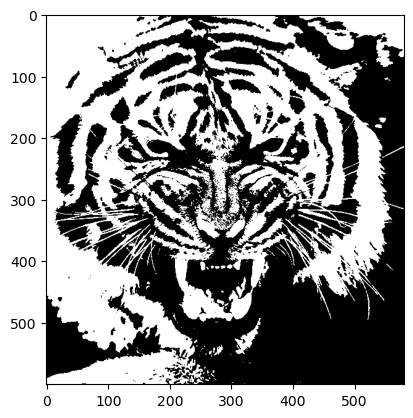

In [38]:
plt.imshow(tresholded, cmap = 'gray')
plt.show()

### Erosion

#### A structuring element with an arbitrary shape is selected, and then all pixels within this shape are replaced with the value of the pixel whose value is the smallest

### Dilation

#### The same operation but replace with the biggest value

### Difference between images

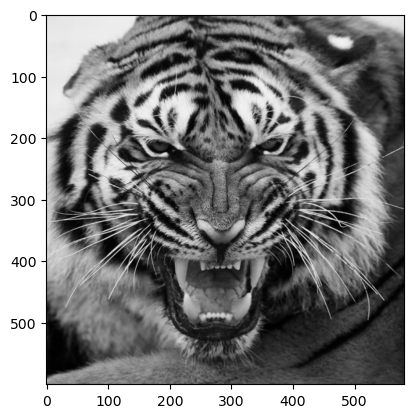

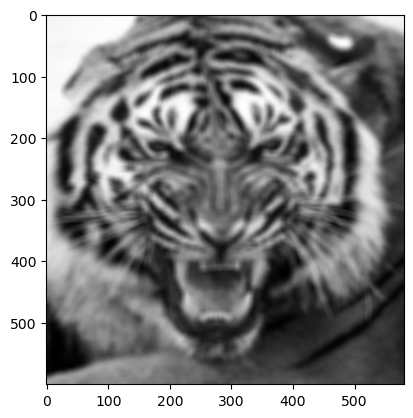

In [39]:
conv_filter = np.ones([11, 11]) / 121
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()
result = convolve(tiger_grayscale, conv_filter)
plt.imshow(result, cmap = 'gray')
plt.show()

In [40]:
result - tiger_grayscale

array([[ 0.90909091,  0.90909091,  0.90909091, ...,  0.96915702,
         0.87943802,  0.87943802],
       [ 1.        ,  1.        ,  1.        , ...,  0.91207438,
         0.82482645,  0.82482645],
       [ 0.19368595,  0.19368595,  0.19368595, ..., -0.16153719,
        -0.24631405, -0.24631405],
       ...,
       [-9.53349587, -7.67668595, -6.73720661, ...,  0.86250413,
         1.91252066,  1.93749587],
       [ 4.86701653,  7.38209917,  9.41985124, ..., -2.22310744,
        -1.0957438 , -1.0047438 ],
       [18.18752893, 21.37117355, 24.8253719 , ..., -3.25958678,
        -3.0632314 , -1.93926446]])

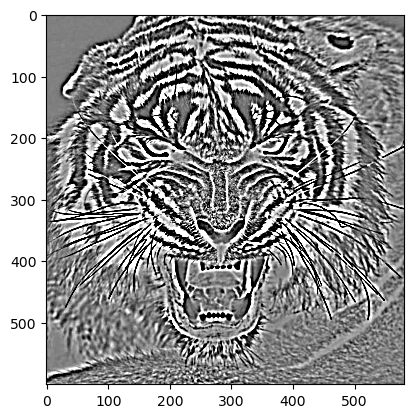

In [41]:
plt.imshow(result - tiger_grayscale, cmap = 'gray', vmin = -20, vmax = 20)
plt.show()

### Multiplication and division of images.

In [42]:
tiger_mean = tiger_grayscale / tiger_grayscale.mean()

In [43]:
tiger_mean

array([[2.17119118, 2.17119118, 2.17119118, ..., 2.18378614, 2.18378614,
        2.18378614],
       [2.17119118, 2.17119118, 2.17119118, ..., 2.18378614, 2.18378614,
        2.18378614],
       [2.18088707, 2.18088707, 2.18088707, ..., 2.19348203, 2.19348203,
        2.19348203],
       ...,
       [1.6303059 , 1.60870345, 1.5923174 , ..., 0.47489505, 0.46519916,
        0.46519916],
       [1.49304117, 1.46406015, 1.43566089, ..., 0.50398272, 0.49428683,
        0.49428683],
       [1.36489058, 1.32900609, 1.28632477, ..., 0.51367861, 0.51367861,
        0.50398272]])

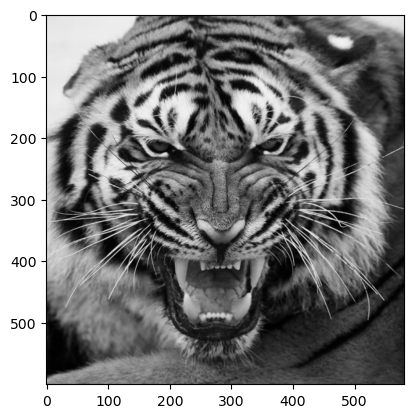

In [44]:
plt.imshow(tiger_mean, cmap = 'gray')
plt.show()

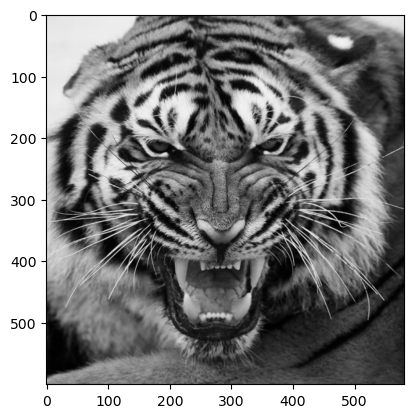

In [45]:
# Applying Z-score to the image - standartization  
tiger_z = (tiger_grayscale - tiger_grayscale.mean())/ tiger_grayscale.std(ddof = 1)
plt.imshow(tiger_z, cmap = 'gray')
plt.show()

In [46]:
tiger_z.mean(), tiger_z.std(ddof = 1)

(6.403051779723201e-17, 0.9999999999999998)

#### Resizing image

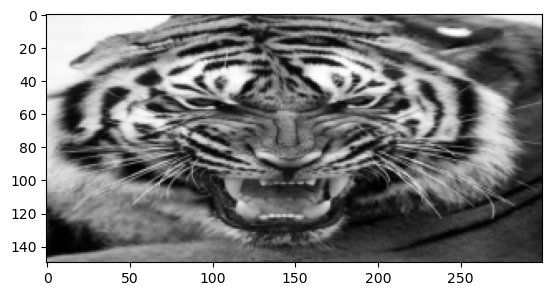

In [47]:
plt.imshow(resize(tiger_grayscale, (150, 300)), cmap = 'gray')
plt.show()

## Text Processing

In [48]:
with open("Data/alice.txt", "r",encoding="utf-8") as f:
    text = f.read()

In [49]:
character_counter = Counter(text)

In [50]:
chars = character_counter.most_common(20)

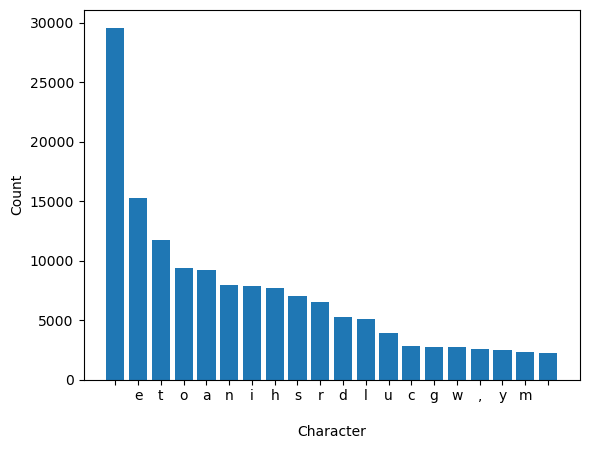

In [51]:
plt.bar([ch[0] for ch in chars], [ch[1] for ch in chars])
plt.xlabel('Character')
plt.ylabel('Count')

plt.show()

In [52]:
words = re.split('\W+', text)

In [53]:
words = [w.lower() for w in words]

In [54]:
stop = set(stopwords.words("english"))

In [55]:
word_counter = Counter(words)

In [56]:
word_counter.most_common(20)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218)]

In [57]:
# Get all non-stop words from variable words
words = [w for w in words if w not in stop]

In [58]:
word_counter = Counter(words)

In [59]:
word_counter.most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

In [60]:
stemmer = PorterStemmer()
words_for_stemming = ['flies', 'caresses', 'seizing', 'itemization', 'sensational']
print([stemmer.stem(w) for w in words_for_stemming])

['fli', 'caress', 'seiz', 'item', 'sensat']


In [61]:
words = [stemmer.stem(w) for w in words]

In [62]:
word_counter.most_common(20)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

# Tasks from test

### 1. Task

In [10]:
hamburger = plt.imread('Data/hamburger.jpg')

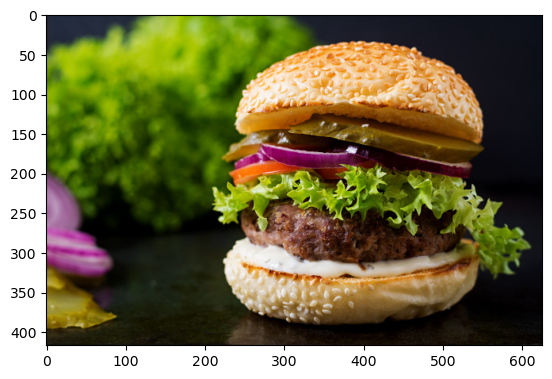

In [12]:
plt.imshow(hamburger)
plt.show()

In [14]:
import os
image_size = os.path.getsize('C:\\Users\\lenovo\\Desktop\\Artificial Inteligence\\Data Science\\Working with Images and Text\\Lab\\Data\\hamburger.jpg')
image_size

90782

### 2. Task

In [15]:
circles = plt.imread('Data/Circles.png')

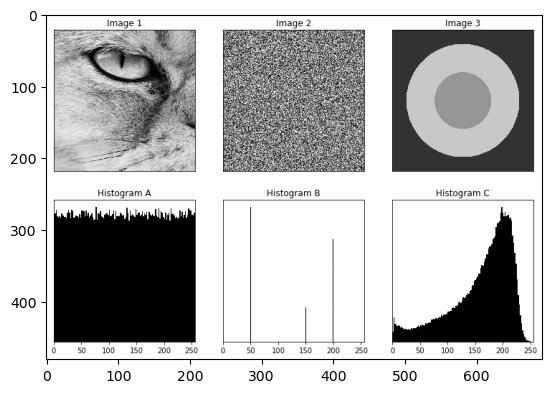

In [16]:
plt.imshow(circles)
plt.show()

In [17]:
circles.shape

(481, 692, 4)

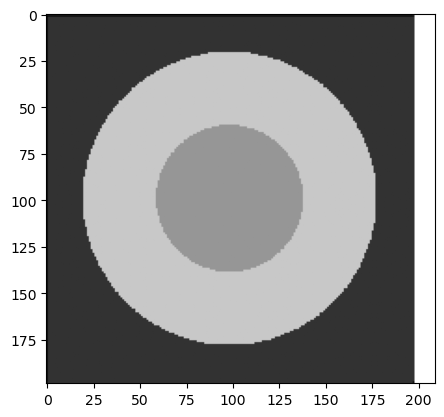

In [41]:
plt.imshow(circles[21:220, 483:])
plt.show()

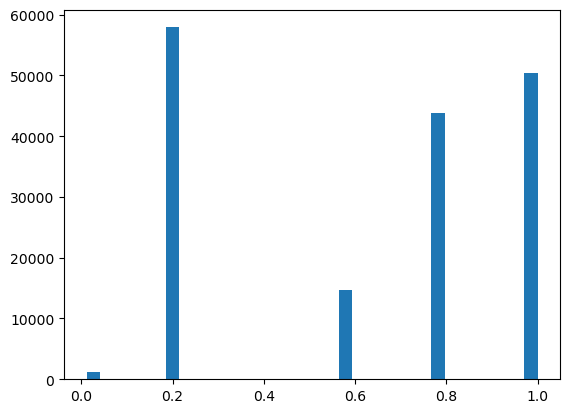

In [38]:
circles1 = circles[20:220, 482:, 0:190]
plt.hist(circles1.ravel(), bins = 'fd')
plt.show()

### 3.Task

In [46]:
hamburger_r = hamburger[:, :, 0]
hamburger_g = hamburger[:, :, 1]
hamburger_b = hamburger[:, :, 2]

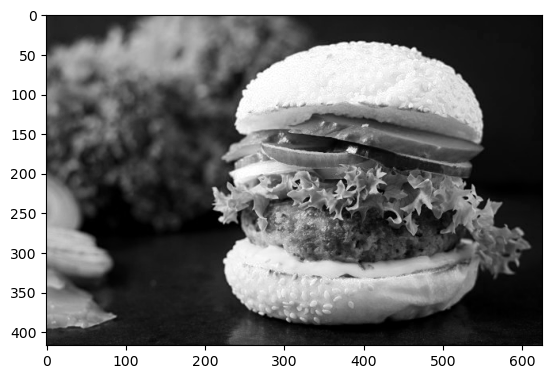

In [48]:
plt.imshow(hamburger_r, cmap = 'gray')
plt.show()

In [51]:
hamburger_r.mean(),hamburger_g.mean(),hamburger_b.mean()

(90.08790156373304, 84.07082002129926, 36.792577439645726)

In [52]:
round(hamburger_r.mean(), 2)

90.09